In [ ]:
'''
需求：对美国总统选举民调数据按月求和

数据分析的基本流程：
1、加载csv数据
    加载列：enddate，adjpoll_clinton，adjpoll_trump
2、数据处理：
    日期数据的处理：mm/dd/yyyy ===> YYYY-mm
    两位候选人数据清洗：
        处理缺失值
    数据格式进行转换 str==》float64
3、数据分析

4、数据呈现
    用折线图反映两位候选人选情的变化
    用柱形图比较两位候选人民调数据

'''

In [1]:
import numpy as np
import datetime

# 1、加载csv数据

In [2]:
filename = './data/presidential_polls.csv'
data_array = np.loadtxt(filename,
                       delimiter=',',
                       skiprows=1,
                       dtype=str,
                       usecols=(7,17,18))
print(data_array)

[['10/31/2016' '42.6414' '40.86509']
 ['10/30/2016' '43.29659' '44.72984']
 ['10/30/2016' '46.29779' '40.72604']
 ...
 ['9/22/2016' '45.9713' '39.97518']
 ['6/21/2016' '45.2939' '46.66175']
 ['8/18/2016' '31.62721' '44.65947']]


# 2、数据处理

### 日期数据的处理

In [5]:
enddate_ls = data_array[:,0].tolist()
print(enddate_ls)

['10/31/2016', '10/30/2016', '10/30/2016', '10/24/2016', '10/25/2016', '10/25/2016', '10/31/2016', '10/30/2016', '10/27/2016', '10/31/2016', '10/31/2016', '10/27/2016', '10/23/2016', '10/30/2016', '10/26/2016', '10/26/2016', '10/24/2016', '10/24/2016', '10/28/2016', '10/25/2016', '10/17/2016', '10/28/2016', '10/28/2016', '10/26/2016', '10/28/2016', '10/26/2016', '10/28/2016', '10/31/2016', '10/30/2016', '10/25/2016', '10/24/2016', '10/30/2016', '10/30/2016', '10/30/2016', '10/30/2016', '10/30/2016', '10/23/2016', '10/24/2016', '10/24/2016', '10/30/2016', '10/26/2016', '10/30/2016', '10/26/2016', '10/18/2016', '10/22/2016', '10/24/2016', '10/25/2016', '10/30/2016', '10/30/2016', '10/31/2016', '10/24/2016', '10/30/2016', '10/29/2016', '10/30/2016', '10/31/2016', '10/26/2016', '10/30/2016', '10/21/2016', '10/31/2016', '10/20/2016', '10/22/2016', '10/27/2016', '10/24/2016', '10/26/2016', '10/26/2016', '10/26/2016', '10/28/2016', '10/26/2016', '10/23/2016', '10/27/2016', '10/26/2016', '10/2

### 日期字符串==》日期对象

In [6]:
print(datetime.datetime.strptime('10/31/2016','%m/%d/%Y'))
date_ls = [datetime.datetime.strptime(enddate,'%m/%d/%Y') for enddate in enddate_ls]
print(date_ls)

2016-10-31 00:00:00
[datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 10, 30, 0, 0), datetime.datetime(2016, 10, 30, 0, 0), datetime.datetime(2016, 10, 24, 0, 0), datetime.datetime(2016, 10, 25, 0, 0), datetime.datetime(2016, 10, 25, 0, 0), datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 10, 30, 0, 0), datetime.datetime(2016, 10, 27, 0, 0), datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 10, 27, 0, 0), datetime.datetime(2016, 10, 23, 0, 0), datetime.datetime(2016, 10, 30, 0, 0), datetime.datetime(2016, 10, 26, 0, 0), datetime.datetime(2016, 10, 26, 0, 0), datetime.datetime(2016, 10, 24, 0, 0), datetime.datetime(2016, 10, 24, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), datetime.datetime(2016, 10, 25, 0, 0), datetime.datetime(2016, 10, 17, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), datetime.datetime(2016, 10, 26, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), date

### 日期对象 ==》日期字符串YYYY-MM

In [7]:
month_list = ["%d-%02d"%(date_obj.year,date_obj.month) for date_obj in date_ls]
print(month_list)

['2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10'

### list ==> ndarray

In [8]:
month_array = np.array(month_list)
print(month_array)

['2016-10' '2016-10' '2016-10' ... '2016-09' '2016-06' '2016-08']


### 对日期数据去重排序


In [9]:
months = np.unique(month_array)
print(months)

['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


### 希拉里民调数据处理

In [10]:
# 获取希拉里的民调数据
adjpoll_clienton_data = data_array[:,1]
print(adjpoll_clienton_data)

['42.6414' '43.29659' '46.29779' ... '45.9713' '45.2939' '31.62721']


### 数据清洗，处理无效缺失的数据


In [11]:
adjpoll_clienton_data = np.where(adjpoll_clienton_data == "","0",adjpoll_clienton_data)
print(adjpoll_clienton_data)

['42.6414' '43.29659' '46.29779' ... '45.9713' '45.2939' '31.62721']


### 数据格式转换 str==>float64

In [13]:
adjpoll_clienton_data = adjpoll_clienton_data.astype(np.float64)
print(adjpoll_clienton_data)
print(adjpoll_clienton_data.dtype)

[42.6414  43.29659 46.29779 ... 45.9713  45.2939  31.62721]
float64


### 处理川普的民调数据

In [15]:
adjpoll_trump_data = data_array[:,2]
print(adjpoll_trump_data)

['40.86509' '44.72984' '40.72604' ... '39.97518' '46.66175' '44.65947']


### 数据清洗，处理缺失的数据

In [16]:
adjpoll_trump_data = np.where(adjpoll_trump_data=="","0",adjpoll_trump_data)
print(adjpoll_trump_data)

['40.86509' '44.72984' '40.72604' ... '39.97518' '46.66175' '44.65947']


### 数据类型的转换 str==>float64

In [17]:
adjpoll_trump_data = adjpoll_trump_data.astype(np.float64)
print(adjpoll_trump_data)

[40.86509 44.72984 40.72604 ... 39.97518 46.66175 44.65947]


# 3、数据分析

In [23]:
result = []
for month in months:
    condition = month_array == month
    # 当前月份希拉里民调数据的和
    adjpoll_clienton_month_data = adjpoll_clienton_data[condition]
    # 统计求和
    adjpoll_clienton_month_sum = np.sum(adjpoll_clienton_month_data)
    # 当前月份川普民调数据的和
    adjpoll_trump_month_data = adjpoll_trump_data[condition]
    # 统计求和
    adjpoll_trump_month_sum = np.sum(adjpoll_trump_month_data)
    result.append([month,adjpoll_clienton_month_sum,adjpoll_trump_month_sum])
    

In [24]:
print(result)

[['2015-11', 1916.6980600000002, 1937.3290100000002], ['2015-12', 4637.25688, 4088.9218999999994], ['2016-01', 6585.167019999999, 6253.24935], ['2016-02', 7946.228610000001, 7672.3398], ['2016-03', 11156.09824, 9991.59358], ['2016-04', 11579.426780000002, 9884.156190000002], ['2016-05', 12242.27538, 12069.761290000002], ['2016-06', 19771.335759999998, 18154.90623], ['2016-07', 23233.111679999998, 22757.07327], ['2016-08', 67909.28210000001, 66428.29714000001], ['2016-09', 102445.45295, 106065.00385000001], ['2016-10', 165319.59355, 164990.78638900002]]


# 数据呈现

### list ==> ndarray

In [26]:
arr = np.array(result)
print(type(arr))

<class 'numpy.ndarray'>


### 月份

In [27]:
months = arr[:,0]
print(months)

['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


### 希拉里的数据

In [28]:
adjpoll_clienton_sum = arr[:,1]
print(adjpoll_clienton_sum)

['1916.6980600000002' '4637.25688' '6585.167019999999' '7946.228610000001'
 '11156.09824' '11579.426780000002' '12242.27538' '19771.335759999998'
 '23233.111679999998' '67909.28210000001' '102445.45295' '165319.59355']


### 数据类型转换 

In [30]:
adjpoll_clienton_sum = adjpoll_clienton_sum.astype(np.float64)
print(adjpoll_clienton_sum)
print(adjpoll_clienton_sum.dtype)

[  1916.69806   4637.25688   6585.16702   7946.22861  11156.09824
  11579.42678  12242.27538  19771.33576  23233.11168  67909.2821
 102445.45295 165319.59355]
float64


### 川普的数据

In [31]:
adjpoll_trump_sum = arr[:,2]
print(adjpoll_trump_sum)

['1937.3290100000002' '4088.9218999999994' '6253.24935' '7672.3398'
 '9991.59358' '9884.156190000002' '12069.761290000002' '18154.90623'
 '22757.07327' '66428.29714000001' '106065.00385000001'
 '164990.78638900002']


### 数据类型转换

In [32]:
adjpoll_trump_sum = adjpoll_trump_sum.astype(np.float64)
print(adjpoll_trump_sum)

[  1937.32901    4088.9219     6253.24935    7672.3398     9991.59358
   9884.15619   12069.76129   18154.90623   22757.07327   66428.29714
 106065.00385  164990.786389]


In [33]:
import matplotlib.pyplot as plt

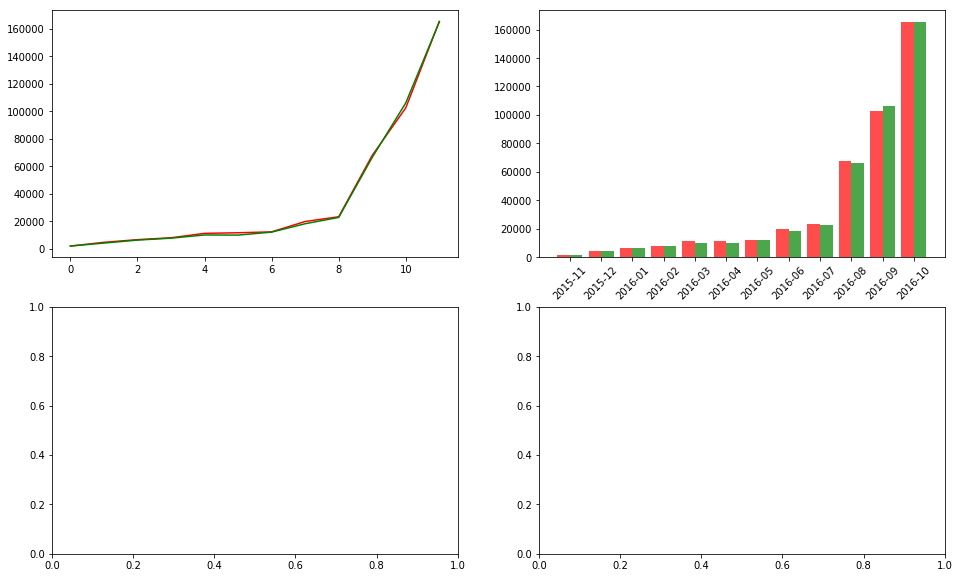

In [38]:
fig,subplot_arr = plt.subplots(2,2,figsize=(16,10))
# 用折线图反映两位候选人选情的走势
subplot_arr[0,0].plot(adjpoll_clienton_sum,color='r')
subplot_arr[0,0].plot(adjpoll_trump_sum,color='g')
# 柱形图比较两位候选人民调的数据
width = 0.4
x = np.arange(len(months))
subplot_arr[0,1].bar(x,adjpoll_clienton_sum,width,color='r',alpha=0.7)
subplot_arr[0,1].bar(x+width,adjpoll_trump_sum,width,color='g',alpha=0.7)
subplot_arr[0,1].set_xticks(x+width/2)
subplot_arr[0,1].set_xticklabels(months,rotation=45)
plt.savefig('poll.png')
plt.show()